## Original data

In [11]:
# Get filenames in list
from os import listdir
from os.path import isfile, join

mypath = "./aug_datasets/images/"

file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

print(str(len(file_names)) + ' images loaded')

10308 images loaded


## Create Testing & Training DataSet

In [8]:
import cv2
import numpy as np
import sys
import os
import shutil

clam_count = 0
mussels_count = 0
extra_count = 0
training_size = 2686
test_size = 750
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150
clam_dir_train = "./aug_datasets/train/clam/"
mussels_dir_train = "./aug_datasets/train/mussels/"
extra_dir_train = "./aug_datasets/train/xtra/"
clam_dir_val = "./aug_datasets/validation/clam/"
mussels_dir_val = "./aug_datasets/validation/mussels/"
extra_dir_val = "./aug_datasets/validation/xtra/"

def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(clam_dir_train)
make_dir(mussels_dir_train)
make_dir(extra_dir_train)
make_dir(clam_dir_val)
make_dir(mussels_dir_val)
make_dir(extra_dir_val)

def getZeros(number):
    if(number > 100 and number < 1000):
        return "0"
    if(number > 10 and number < 100):
        return "00"
    if(number < 10):
        return "000"
    else:
        return ""

for i, file in enumerate(file_names):
    
    if file_names[i][0] == "c":
        clam_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if clam_count <= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(clam_count)
            cv2.imwrite(clam_dir_train + "clam" + str(zeros) + str(clam_count) + ".jpg", image)
        if clam_count > training_size and clam_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(clam_count-2686)
            cv2.imwrite(clam_dir_val + "clam" + str(zeros) + str(clam_count-2686) + ".jpg", image)
            
    if file_names[i][0] == "m":
        mussels_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if mussels_count <= training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(mussels_count)
            cv2.imwrite(mussels_dir_train + "mussels" + str(zeros) + str(mussels_count) + ".jpg", image)
        if mussels_count > training_size and mussels_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(mussels_count-2686)
            cv2.imwrite(mussels_dir_val + "mussels" + str(zeros) + str(mussels_count-2686) + ".jpg", image)
            
    if file_names[i][0] == "e":
        extra_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if extra_count <= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(extra_count)
            cv2.imwrite(extra_dir_train + "xtra" + str(zeros) + str(extra_count) + ".jpg", image)
        if extra_count > training_size and extra_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(extra_count-2686)
            cv2.imwrite(extra_dir_val + "xtra" + str(zeros) + str(extra_count-2686) + ".jpg", image)

    if clam_count == training_size+test_size and mussels_count == training_size+test_size and extra_count == training_size+test_size:
        break

print("Training and Test Data Extraction Complete")

# Using numpy's savez function to store our loaded data as NPZ files
np.savez('aug_shell_training_data.npz', np.array(training_images))
np.savez('aug_shell_training_labels.npz', np.array(training_labels))
np.savez('aug_shell_test_data.npz', np.array(test_images))
np.savez('aug_shell_test_labels.npz', np.array(test_labels))

Training and Test Data Extraction Complete


# Using MobileNet for our Classifer

### Loading the MobileNet Model

Freeze all layers except the top 4, as we'll only be training the top 4

In [1]:
from tensorflow.keras.applications import MobileNet

img_rows, img_cols = 224, 224

# Re-loading the MobileNet model without the top or FC layers
MobileNet = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in MobileNet.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(MobileNet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 ReLU False
5 DepthwiseConv2D False
6 BatchNormalization False
7 ReLU False
8 Conv2D False
9 BatchNormalization False
10 ReLU False
11 ZeroPadding2D False
12 DepthwiseConv2D False
13 BatchNormalization False
14 ReLU False
15 Conv2D False
16 BatchNormalization False
17 ReLU False
18 DepthwiseConv2D False
19 BatchNormalization False
20 ReLU False
21 Conv2D False
22 BatchNormalization False
23 ReLU False
24 ZeroPadding2D False
25 DepthwiseConv2D False
26 BatchNormalization False
27 ReLU False
28 Conv2D False
29 BatchNormalization False
30 ReLU False
31 DepthwiseConv2D False
32 BatchNormalization False
33 ReLU False
34 Conv2D False
35 BatchNormalization False
36 ReLU False
37 ZeroPadding2D False
38 DepthwiseConv2D False
39 BatchNormalization False
40 ReLU False
41 Conv2D False
42 BatchNormalization False
43 ReLU False
44 Depthw

### Let's make a function that returns our FC Head

In [2]:
def addTopModelMobileNet(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dropout(0.25)(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

### Let's add our FC Head back onto MobileNet

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

num_classes = 3

FC_Head = addTopModelMobileNet(MobileNet, num_classes)

    
model = Model(inputs = MobileNet.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

### Loading our ShellFish Dataset

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_rows, img_cols = 224, 224 
train_data_dir = './aug_datasets/train'
validation_data_dir = './aug_datasets/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 64
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')


Found 8058 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.


### Training out Model
- Note we're using checkpointing and early stopping

In [6]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("Aug_Shell_mobileNet_v2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

# Using call backs into a callback list
callbacks = [earlystop, checkpoint]

# Using a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

# Number of training and validation samples here
nb_train_samples = 8058
nb_validation_samples = 2250

epochs = 64
batch_size = 64

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

scores = model.evaluate(validation_generator, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/64
 35/125 [=======>......................] - ETA: 8s - loss: 0.6228 - acc: 0.8781
Epoch 00001: val_loss improved from inf to 0.62285, saving model to Aug_Shell_mobileNet_v2.h5
125/125 [==============================] - 65s 521ms/step - loss: 0.2324 - acc: 0.9332 - val_loss: 0.6228 - val_acc: 0.8781
Epoch 2/64
 35/125 [=======>......................] - ETA: 8s - loss: 0.4139 - acc: 0.9214
Epoch 00002: val_loss improved from 0.62285 to 0.41386, saving model to Aug_Shell_mobileNet_v2.h5
125/125 [==============================] - 65s 518ms/step - loss: 0.1782 - acc: 0.9403 - val_loss: 0.4139 - val_acc: 0.9214
Epoch 3/64
 35/125 [=======>......................] - ETA: 7s - loss: 1.1348 - acc: 0.8205
Epoch 00003: val_loss did not improve from 0.41386
125/125 [==============================] - 64s 509ms/step - loss: 0.1835 - acc: 0.9357 - val_loss: 1.1348 - val_acc: 0.8205
Epoch 4/64
 35/125 [=======>......................] - ETA: 7s - loss: 0.5629 - acc: 0.9112
Epoch 00004: val_loss

### Loading our classifer


In [7]:
from tensorflow.keras.models import load_model

classifier = load_model('Aug_Shell_mobileNet_v2.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Testing our classifer on some test images

In [8]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

shell_dict = {"[0]": "clam", "[1]": "mussels", "[2]": "xtra" }

shell_dict_n = {"mussels": "mussels", "clam": "clam", "xtra": "xtra" }

def draw_test(name, pred, im):
    shell = shell_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 80, 80, 80 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, shell, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + shell_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,30):
    input_im = getRandomImage("./aug_datasets/validation/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, (380, 380), fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

In [9]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=1.5, marker = '+', markersize=5.0)
plt.setp(line2, linewidth=1.5, marker = '4', markersize=5.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=1.5, marker = '+', markersize=5.0)
plt.setp(line2, linewidth=1.5, marker = '4', markersize=5.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

## Training with different batch sizes (32)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_rows, img_cols = 224, 224 
train_data_dir = './aug_datasets/train'
validation_data_dir = './aug_datasets/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 32
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')


In [31]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("Aug_Shell_mobileNet32_224.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

# Using call backs into a callback list
callbacks = [earlystop, checkpoint]

# Using a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

# Number of training and validation samples here
nb_train_samples = 8058
nb_validation_samples = 2250

epochs = 64
batch_size = 32

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

scores = model.evaluate(validation_generator, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/64
251/251 [==============================] - 131s 517ms/step - loss: 0.4200 - accuracy: 0.9490 - val_loss: 0.1146 - val_accuracy: 0.9683

Epoch 00001: val_loss improved from inf to 0.11465, saving model to Aug_Shell_mobileNet32_224.h5
Epoch 2/64
251/251 [==============================] - 127s 505ms/step - loss: 0.1255 - accuracy: 0.9614 - val_loss: 0.0865 - val_accuracy: 0.9701

Epoch 00002: val_loss improved from 0.11465 to 0.08654, saving model to Aug_Shell_mobileNet32_224.h5
Epoch 3/64
251/251 [==============================] - 133s 531ms/step - loss: 0.0847 - accuracy: 0.9693 - val_loss: 0.1465 - val_accuracy: 0.9714

Epoch 00003: val_loss did not improve from 0.08654
Epoch 4/64
251/251 [==============================] - 127s 507ms/step - loss: 0.1209 - accuracy: 0.9669 - val_loss: 0.2026 - val_accuracy: 0.9656

Epoch 00004: val_loss did not improve from 0.08654
Epoch 5/64
251/251 [==============================] - 126s 502ms/step - loss: 0.1064 - accuracy: 0.9696 - val_lo

## Training with different batch sizes (16)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_rows, img_cols = 224, 224 
train_data_dir = './aug_datasets/train'
validation_data_dir = './aug_datasets/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 16
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')


Found 8058 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.


In [33]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("Aug_Shell_mobileNet16_224.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

# Using call backs into a callback list
callbacks = [earlystop, checkpoint]

# Using a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

# Number of training and validation samples here
nb_train_samples = 8058
nb_validation_samples = 2250

epochs = 64
batch_size = 16

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

scores = model.evaluate(validation_generator, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/64
503/503 [==============================] - 130s 256ms/step - loss: 0.2165 - accuracy: 0.9549 - val_loss: 0.1725 - val_accuracy: 0.9464

Epoch 00001: val_loss improved from inf to 0.17249, saving model to Aug_Shell_mobileNet16_224.h5
Epoch 2/64
503/503 [==============================] - 126s 251ms/step - loss: 0.1497 - accuracy: 0.9607 - val_loss: 0.3317 - val_accuracy: 0.9616

Epoch 00002: val_loss did not improve from 0.17249
Epoch 3/64
503/503 [==============================] - 127s 253ms/step - loss: 0.1732 - accuracy: 0.9535 - val_loss: 0.2054 - val_accuracy: 0.9683

Epoch 00003: val_loss did not improve from 0.17249
Epoch 4/64
503/503 [==============================] - 127s 252ms/step - loss: 0.1614 - accuracy: 0.9632 - val_loss: 0.0869 - val_accuracy: 0.9723

Epoch 00004: val_loss improved from 0.17249 to 0.08694, saving model to Aug_Shell_mobileNet16_224.h5
Epoch 5/64
503/503 [==============================] - 128s 255ms/step - loss: 0.1211 - accuracy: 0.9683 - val_lo

## Removing Earlystop

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_rows, img_cols = 224, 224 
train_data_dir = './aug_datasets/train'
validation_data_dir = './aug_datasets/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 64
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')


Found 8058 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.


In [35]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("Aug_Shell_mobileNet_full_224.h5",
                             monitor="val_loss",
                             mode="min",
                             verbose=1)

# earlystop = EarlyStopping(monitor = 'val_loss', 
#                           min_delta = 0, 
#                           patience = 5,
#                           verbose = 1,
#                           restore_best_weights = True)

# # Using call backs into a callback list
# callbacks = [earlystop, checkpoint]

# Using a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

# Number of training and validation samples here
nb_train_samples = 8058
nb_validation_samples = 2250

epochs = 32
batch_size = 64

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    #callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

scores = model.evaluate(validation_generator, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/32
125/125 [==============================] - 31s 243ms/step - loss: 0.1690 - accuracy: 0.9741 - val_loss: 0.1566 - val_accuracy: 0.9679
Epoch 2/32
125/125 [==============================] - 31s 247ms/step - loss: 0.0907 - accuracy: 0.9788 - val_loss: 0.1112 - val_accuracy: 0.9768
Epoch 3/32
125/125 [==============================] - 31s 249ms/step - loss: 0.1114 - accuracy: 0.9703 - val_loss: 0.0431 - val_accuracy: 0.9857
Epoch 4/32
125/125 [==============================] - 30s 243ms/step - loss: 0.1103 - accuracy: 0.9736 - val_loss: 0.2832 - val_accuracy: 0.9607
Epoch 5/32
125/125 [==============================] - 30s 243ms/step - loss: 0.1238 - accuracy: 0.9703 - val_loss: 0.1777 - val_accuracy: 0.9679
Epoch 6/32
125/125 [==============================] - 31s 249ms/step - loss: 0.0725 - accuracy: 0.9696 - val_loss: 0.1767 - val_accuracy: 0.9768
Epoch 7/32
125/125 [==============================] - 31s 246ms/step - loss: 0.0948 - accuracy: 0.9809 - val_loss: 0.3389 - val_ac

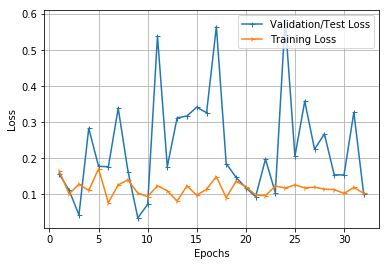

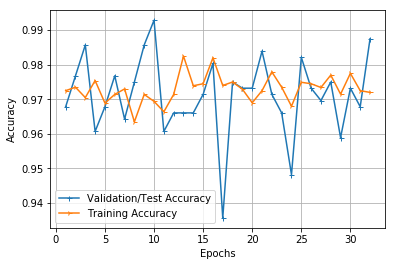

In [36]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=1.5, marker = '+', markersize=5.0)
plt.setp(line2, linewidth=1.5, marker = '4', markersize=5.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=1.5, marker = '+', markersize=5.0)
plt.setp(line2, linewidth=1.5, marker = '4', markersize=5.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()